# QAOA for the Max Cut problem

1. explain the qaoa algorithm for maxcut
2. implement the quantum circuit using my simulator
3. try to solve the graph problems using simulator for n = 5 using an optimizer
4. what initial parameters and optimizer can i change for my simulator
5. what is the performance metric? how does it perform on bigger graphs? generate 3 different graphs for each size, scale that up, keep track of runtime
6. use openqaoa to solve the problems and compare.
7. what are some relevant graphs that we want to solve? can it solve them?
8. whisker box plot for each n


combinatorial optimization has only discrete variables that describe the task. the solution set is a subset of the discrete set of initialization
the max cut problem is rewritten as weighted max sat.
relate this to the sat problem and 3 sat maybe?


In [4]:
# Import statements
from pennylane import qaoa
from pennylane import numpy as np
from pennylane import qulacs
from matplotlib import pyplot as plt
import networkx as nx

In [15]:
SEED = 420

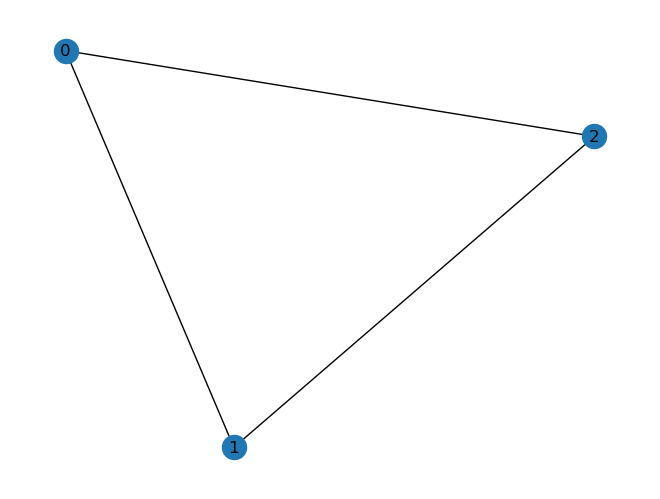

In [18]:
graph = nx.complete_graph(3)
positions = nx.spring_layout(graph, seed=SEED)
nx.draw(graph, with_labels=True, pos=positions)

In [20]:
def qaoa_maxcut(g, depth, updates):
    cost_h, mixer_h = qaoa.maxcut(g)

    def qaoa_layer(gamma, beta):
        qaoa.cost_layer(gamma, cost_h)
        qaoa.mixer_layer(beta, mixer_h)

    qubits = range(g.order())

    def circuit(ps, **kwargs):
        for q in qubits:
            qml.Hadamard(wires=q)
        qml.layer(qaoa_layer, depth, ps[0], ps[1])

    dev = qml.device("qulacs.simulator", wires=qubits)

    @qml.qnode(dev)
    def cost_function(ps):
        circuit(ps)
        return qml.expval(cost_h)

    optimizer = qml.GradientDescentOptimizer()
    param = [0.5] * depth
    params = np.array([param, param], requires_grad=True)

    for i in range(updates):
        params = optimizer.step(cost_function, params)

    print("Optimal Parameters")
    print(params)

    @qml.qnode(dev)
    def probability_circuit(gamma, alpha):
        circuit([gamma, alpha])
        return qml.probs(wires=wires)


    probs = probability_circuit(params[0], params[1])

    plt.style.use("seaborn")
    plt.bar(range(2 ** G.order()), probs)
    plt.show()

In [21]:
qaoa_maxcut(graph, 3, 100)

DeviceError: Device does not exist. Make sure the required plugin is installed.

In [ ]:
# datasets
complete_graphs = []
circular_ladder_graphs = []
cycle_graphs = []
ladder_graphs = []
wheel_graphs = []
star_graphs = []
regular_graphs = [] # [maybe_regular_expander]

In [14]:
print([0.5] * 5)

[0.5, 0.5, 0.5, 0.5, 0.5]


# References

Code adapted from https://pennylane.ai/qml/demos/tutorial_qaoa_intro
